<a href="https://colab.research.google.com/github/dotnetworm/DataScience/blob/master/Data_Visualization_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Veri Görselleştirme 2

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(5,5)})

In [14]:
df = pd.read_csv('world-happiness-report.csv')
df.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [16]:
df['Country name'].value_counts()

Uganda                15
Dominican Republic    15
Sweden                15
Spain                 15
United States         15
                      ..
Suriname               1
Cuba                   1
Guyana                 1
Oman                   1
Maldives               1
Name: Country name, Length: 166, dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [18]:
from os import mkdir

In [19]:
try:
  mkdir('Plots')

except:
  pass

mypath = 'Plots'

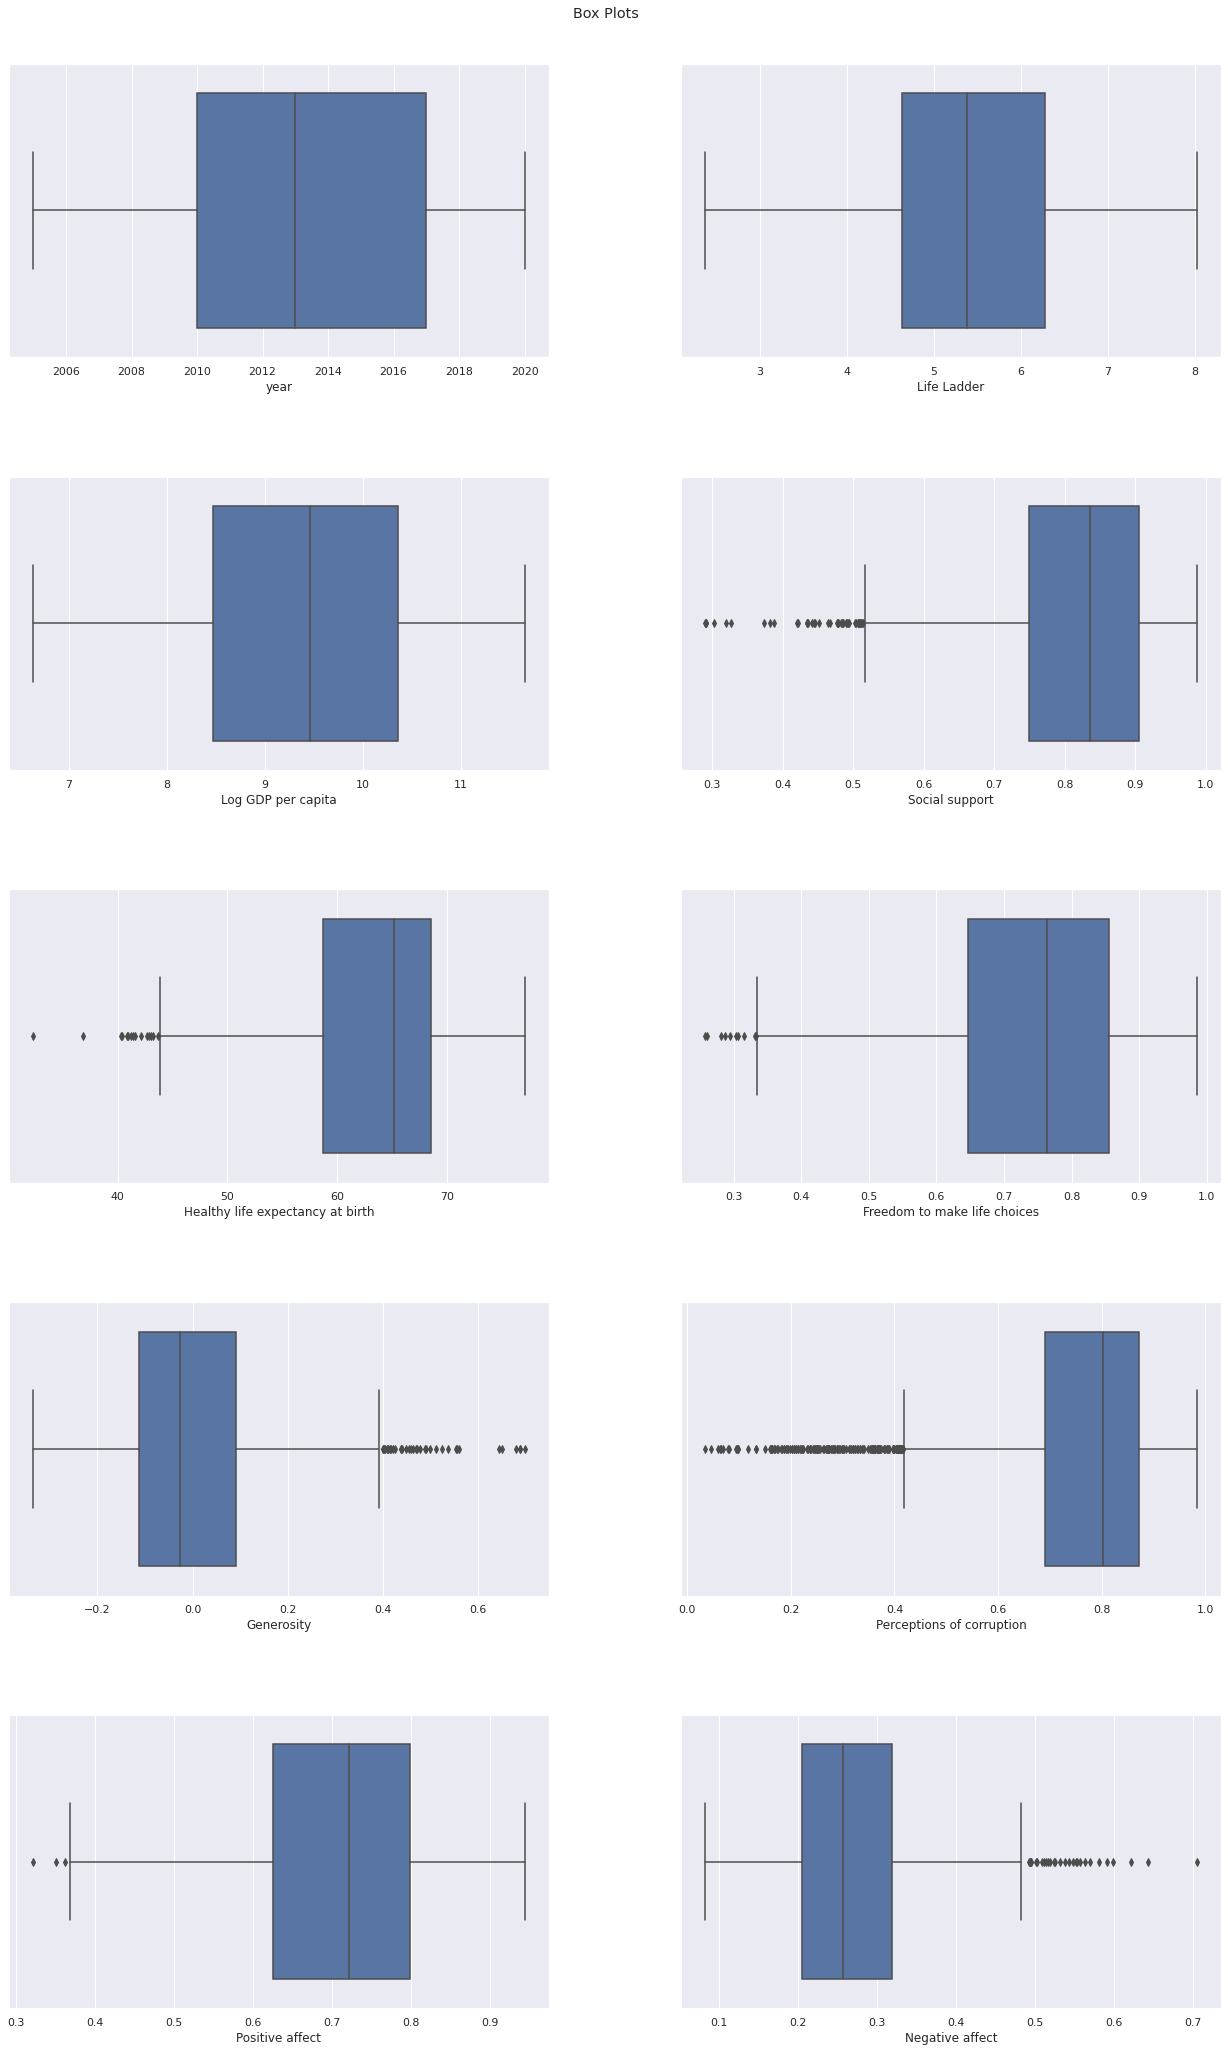

In [44]:
f, axes = plt.subplots(5, 2, figsize = (20, 30))
f.tight_layout(pad=8)
f.suptitle("Box Plots")
cols = df.select_dtypes(exclude="object").columns
x_axis = 0
y_axis = 0
for col in cols:
  sns.boxplot(data=df, x=col,  ax=axes[x_axis, y_axis])
  if y_axis == 1: 
    y_axis = 0 
    x_axis += 1
  # continue
  else:
    y_axis += 1
plt.savefig('Plots/box_plots.png')
plt.show()

In [49]:
year_group = df.groupby(by='year').sum()

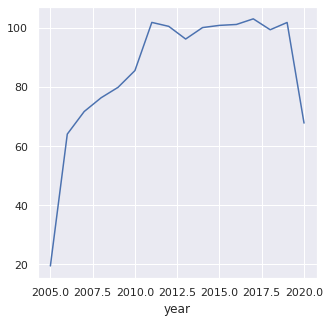

In [51]:
year_group['Positive affect'].plot()
plt.savefig('Plots/positive_affect_plot.png')

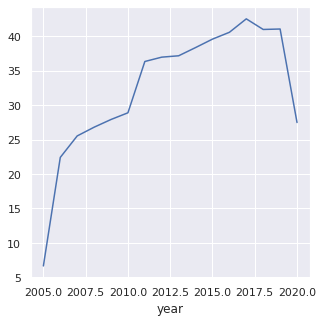

In [52]:
year_group['Negative affect'].plot()
plt.savefig('Plots/negative_affect_plot.png')

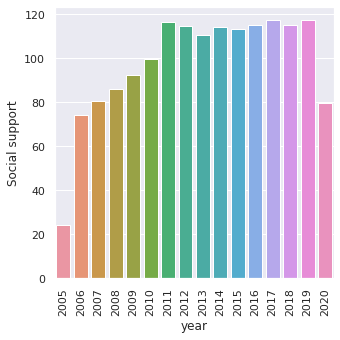

In [61]:
ax1 = sns.barplot(x=year_group.index, y=year_group['Social support'])
ax1.tick_params(axis='x', rotation=90)
plt.savefig('Plots/SocialSupport.png')

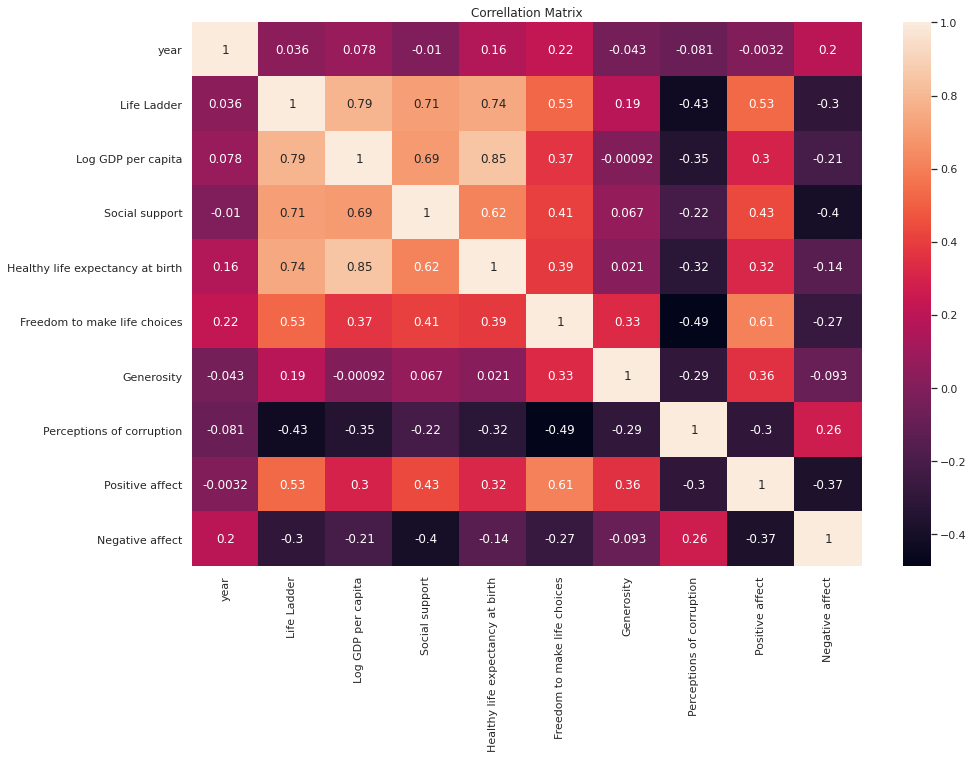

In [65]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), annot=True)
plt.title('Correllation Matrix')
plt.savefig('Plots/Correlation_matrix.png')

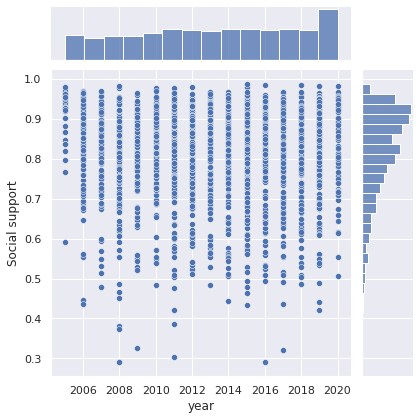

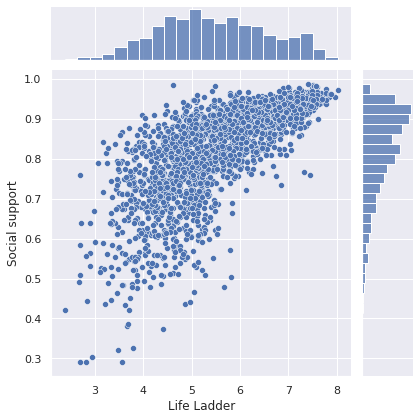

In [67]:
sns.jointplot(data=df, x='year', y='Social support')
sns.jointplot(data=df, x='Life Ladder', y='Social support')
plt.savefig('Plots/jointplots.png')

In [73]:
import os
from os import listdir, mkdir
from os.path import isfile, join

In [77]:
all_files = os.listdir('Plots')
reports = [f'Plots/{file}'for file in all_files]

In [78]:
reports

['Plots/negative_affect_plot.png',
 'Plots/.ipynb_checkpoints',
 'Plots/Correlation_matrix.png',
 'Plots/positive_affect_plot.png',
 'Plots/SocialSupport.png',
 'Plots/histogram_plots.png',
 'Plots/box_plots.png',
 'Plots/jointplots.png']

In [79]:
reports.pop(1)

'Plots/.ipynb_checkpoints'

In [80]:
reports

['Plots/negative_affect_plot.png',
 'Plots/Correlation_matrix.png',
 'Plots/positive_affect_plot.png',
 'Plots/SocialSupport.png',
 'Plots/histogram_plots.png',
 'Plots/box_plots.png',
 'Plots/jointplots.png']

In [81]:
!pip install FPDF

  Created wheel for FPDF: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=e44856242ceb91c912b946a7020f8e0b9025b79d7bdd1e9254398accb52eddc2
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built FPDF


In [82]:
from fpdf import FPDF

In [91]:
WIDTH = 210
HEIGHT = 297
reports

['Plots/negative_affect_plot.png',
 'Plots/Correlation_matrix.png',
 'Plots/positive_affect_plot.png',
 'Plots/SocialSupport.png',
 'Plots/histogram_plots.png',
 'Plots/box_plots.png',
 'Plots/jointplots.png']

In [105]:
pdf = FPDF()
pdf.set_font('Arial', 'B', 56)
pdf.add_page()
pdf.cell(190, 20, txt='REPORT', align='C')
for report in reports:
  pdf.set_font('Arial', 'B', 24)
  pdf.add_page()
  pdf.cell(190,20, txt=report, align='C')
  pdf.image(report, 5, 30, WIDTH -5)
pdf.output('Countries_report.pdf')

''